# Introduccion a limpieza de datos 

Tema a cubrir:
* Estructura de datos
* Verificacion de tipo de datos
* Identificacion de valores faltantes
* Imputcion (medidas, algoritmos, constantes, otros.)
* Valores faltantes eliminacion

## EDA
Entendemos la parte de EDA como el analisis exploratorio de datos, esta nos sirve para comprender la problematica, el alcance, que preguntas podemos hacernos para resolver la problematica. familiarizarnos con los datos en mano.
Para eso pasamos a la fase de :
### Estructura de datos

Durante esta fase priorizaremos el entender que tipo de datos estamos trabajano, no hablando de formato ni de tipo de variables, sino de la estructura, para esto existen 3 tipos de estructuras 

* Estructurados
* Semi estructurados 
* No estructurados

### Verificacion de tipo de datos

carga del conjunto y visualizacion

In [162]:
import pandas as pd
import numpy as np

df = pd.read_csv('chocolate.csv')
df

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75%,"3- B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


descripcion de las variables ¿continuas?

In [163]:
df.describe()

,ref,review_date,rating
count,2530.000000,2530.000000,2530.000000
mean,1429.800791,2014.374308,3.196344
std,757.648556,3.968267,0.445321
min,5.000000,2006.000000,1.000000
25%,802.000000,2012.000000,3.000000
50%,1454.000000,2015.000000,3.250000
75%,2079.000000,2018.000000,3.500000
max,2712.000000,2021.000000,4.000000


resumen de las categoricas

In [164]:
df['company_manufacturer'].value_counts()

company_manufacturer
Soma                                   56
Fresco                                 39
Arete                                  32
Bonnat                                 30
A. Morin                               26
                                       ..
Rancho San Jacinto                      1
Raoul Boulanger                         1
Raw Cocoa                               1
Heirloom Cacao Preservation (Mindo)     1
Manifesto Cacao                         1
Name: count, Length: 580, dtype: int64

In [165]:
df['company_location'].value_counts()

company_location
U.S.A.                   1136
Canada                    177
France                    176
U.K.                      133
Italy                      78
                         ... 
St.Vincent-Grenadines       1
Martinique                  1
Ghana                       1
Wales                       1
Suriname                    1
Name: count, Length: 67, dtype: int64

In [166]:
df.iloc[:,2]

0        U.S.A.
1        U.S.A.
2        U.S.A.
3        U.S.A.
4        U.S.A.
         ...   
2525    Austria
2526    Austria
2527    Austria
2528    Austria
2529    Austria
Name: company_location, Length: 2530, dtype: object

In [167]:
df.loc[:, ['company_location']]

,company_location
0,U.S.A.
1,U.S.A.
2,U.S.A.
3,U.S.A.
4,U.S.A.
...,...
2525,Austria
2526,Austria
2527,Austria
2528,Austria


In [168]:
df[df['company_location'] == 'Mexico']

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
47,316,Ah Cacao,Mexico,2009,Mexico,Tabasco,70%,"3- B,S,C","gritty, spice, cocoa",3.00
651,2622,Cuna de Piedra,Mexico,2021,Mexico,"Comalcalco, Tabasco, b. 2370003, 2019 harvest",73%,"2- B,S","deep cocoa, fruit, melon",3.75
1129,2606,Hecho,Mexico,2021,Mexico,"Soconusco, La Rioja Farm, Chiapas",70%,"2- B,S","delicate, carame, tang",3.50
1283,431,Ki' Xocolatl,Mexico,2009,Mexico,Dark,72%,"5- B,S,C,V,L","sweet, vanilla domintates, nut",2.00
1342,2186,La Rifa,Mexico,2018,Mexico,"Xoconusco, Chiapas, Coop CASFA",70%,"2- B,S","mild hammy, roasty, sour",3.00
1343,2182,La Rifa,Mexico,2018,Mexico,"Almendra Blanca, Blanco Marfil, Jimenez Garcia",70%,"2- B,S","rich cocoa, mild fruit & nut",3.50
1344,2186,La Rifa,Mexico,2018,Mexico,"Uranga, Chiapas, Jimenez Garcia farm",70%,"2- B,S","citrus,prononced orange",3.50
1652,2490,MUCHO,Mexico,2020,Mexico,"Finca La Rioja E., Cacahoatan, Chiapas",70%,"3- B,S,C","light color, spicy, sweet, sour",3.00
1938,1796,Quetzalli (Wolter),Mexico,2016,Mexico,"Mexico, Lot 28022016",70%,"3- B,S,C","gritty, waxy, leather",2.75
1939,1800,Quetzalli (Wolter),Mexico,2016,Mexico,"Uranga, Lot 22032016",74%,"3- B,S,C","waxy, gritty, spicy, hammy",3.00


### Identificacion de faltantes

In [169]:
df.isna()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2525,False,False,False,False,False,False,False,False,False,False
2526,False,False,False,False,False,False,False,False,False,False
2527,False,False,False,False,False,False,False,False,False,False
2528,False,False,False,False,False,False,False,False,False,False


In [170]:
df.isna().sum()

ref                                  0
company_manufacturer                 0
company_location                     0
review_date                          0
country_of_bean_origin               0
specific_bean_origin_or_bar_name     0
cocoa_percent                        0
ingredients                         87
most_memorable_characteristics       0
rating                               0
dtype: int64

In [171]:
df['ingredients'] = df['ingredients'].fillna(df['ingredients'].mode()[0])


In [172]:
df.isna().sum()

ref                                 0
company_manufacturer                0
company_location                    0
review_date                         0
country_of_bean_origin              0
specific_bean_origin_or_bar_name    0
cocoa_percent                       0
ingredients                         0
most_memorable_characteristics      0
rating                              0
dtype: int64

In [173]:
df[df['ingredients'].isna()]

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating


In [174]:
df['ingredients'].value_counts()

ingredients
3- B,S,C          1086
2- B,S             718
4- B,S,C,L         286
5- B,S,C,V,L       184
4- B,S,C,V         141
2- B,S*             31
4- B,S*,C,Sa        20
3- B,S*,C           12
3- B,S,L             8
4- B,S*,C,V          7
1- B                 6
5-B,S,C,V,Sa         6
4- B,S,V,L           5
4- B,S,C,Sa          5
6-B,S,C,V,L,Sa       4
3- B,S,V             3
4- B,S*,V,L          3
4- B,S*,C,L          2
3- B,S*,Sa           1
2- B,C               1
5- B,S,C,L,Sa        1
Name: count, dtype: int64

In [175]:
df[df['company_manufacturer'] == 'Amazing Cacao']

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
85,1964,Amazing Cacao,Russia,2017,Peru,Maranon,70%,"3- B,S,C","raisins, pungent",3.0
86,1964,Amazing Cacao,Russia,2017,Peru,Platan Bajo,70%,"3- B,S,C","few grits, blackcherry, licorice",3.5


### Imputacion por medidas de tendencia

In [176]:
serie = df['cocoa_percent']
data = serie.values

Con esto añadimos una columa adicional que contiene el porcentaje de cacao como tipo de dato float

In [177]:
arr = []
for i in range(0, len(data)):
    temp = float(data[i].split('%')[0])
    arr.append(temp)

df['percent_number'] = arr
df

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,percent_number
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25,76.0
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50,76.0
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75,76.0
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00,68.0
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,72.0
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,80.0
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75,75.0
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75%,"3- B,S,C","fatty, earthy, cocoa",3.00,75.0
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,70.0


In [178]:
from random import randint

numbers = []
for i in range(0,10):
    numbers.append(randint(0, 2531))
df.loc[numbers]

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,percent_number
905,2150,Five (5)Mile,U.S.A.,2018,Dominican Republic,"Oko Caribe, San Fran. De Mac.,batch A",75%,"2- B,S","roasty, simple",3.50,75.0
1289,2064,Krak,Amsterdam,2018,Madagascar,Mava Sa Ferme D'ottange,70%,"2- B,S","roasty, nutty",3.00,70.0
1044,1642,Georgia Ramon,Germany,2015,Madagascar,Akesson P.,65%,"4- B,S,C,L","sandy, sweet, candy tart",3.25,65.0
52,1173,Alain Ducasse,France,2013,Peru,"Piura, Perou",75%,"5- B,S,C,V,L","cardboard, dirt, roasty",2.50,75.0
1262,2390,Kah Kow - USA,Dominican Republic,2019,Dominican Republic,Mata Larga,71.50%,"3- B,S,C","creamy, balanced, fig, cocoa",3.50,71.5
504,252,Chchukululu (Tulicorp),Ecuador,2008,Ecuador,Los Rios,75%,"3- B,S,C","dry, sandy, cocoa",3.00,75.0
1951,2668,Ranger,U.S.A.,2021,Mexico,Soconusco,70%,"2- B,S","fruit, yogurt, astringent",3.25,70.0
496,404,Cemoi,France,2009,Ecuador,Equateur,72%,"3- B,S,C","sticky, mild mint, bitter",2.75,72.0
2055,2108,Seahorse,U.S.A.,2018,Dominican Republic,Zorzal,70%,"2- B,S","earthy, mild fruit, sticky",3.00,70.0
1154,2150,hexx,U.S.A.,2018,Peru,"Maranon, batch 0723",70%,"2- B,S*","light color, sour, pungent",2.25,70.0


In [179]:
df.loc[numbers, 'percent_number'] = np.nan  #valor nulo o faltante
df.loc[numbers]

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,percent_number
905,2150,Five (5)Mile,U.S.A.,2018,Dominican Republic,"Oko Caribe, San Fran. De Mac.,batch A",75%,"2- B,S","roasty, simple",3.50,NaN
1289,2064,Krak,Amsterdam,2018,Madagascar,Mava Sa Ferme D'ottange,70%,"2- B,S","roasty, nutty",3.00,NaN
1044,1642,Georgia Ramon,Germany,2015,Madagascar,Akesson P.,65%,"4- B,S,C,L","sandy, sweet, candy tart",3.25,NaN
52,1173,Alain Ducasse,France,2013,Peru,"Piura, Perou",75%,"5- B,S,C,V,L","cardboard, dirt, roasty",2.50,NaN
1262,2390,Kah Kow - USA,Dominican Republic,2019,Dominican Republic,Mata Larga,71.50%,"3- B,S,C","creamy, balanced, fig, cocoa",3.50,NaN
504,252,Chchukululu (Tulicorp),Ecuador,2008,Ecuador,Los Rios,75%,"3- B,S,C","dry, sandy, cocoa",3.00,NaN
1951,2668,Ranger,U.S.A.,2021,Mexico,Soconusco,70%,"2- B,S","fruit, yogurt, astringent",3.25,NaN
496,404,Cemoi,France,2009,Ecuador,Equateur,72%,"3- B,S,C","sticky, mild mint, bitter",2.75,NaN
2055,2108,Seahorse,U.S.A.,2018,Dominican Republic,Zorzal,70%,"2- B,S","earthy, mild fruit, sticky",3.00,NaN
1154,2150,hexx,U.S.A.,2018,Peru,"Maranon, batch 0723",70%,"2- B,S*","light color, sour, pungent",2.25,NaN


In [180]:
plt.figure(figsize=(10,20))
sns.boxplot(data=df,y='percent_number')
plt.show

NameError: name 'plt' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

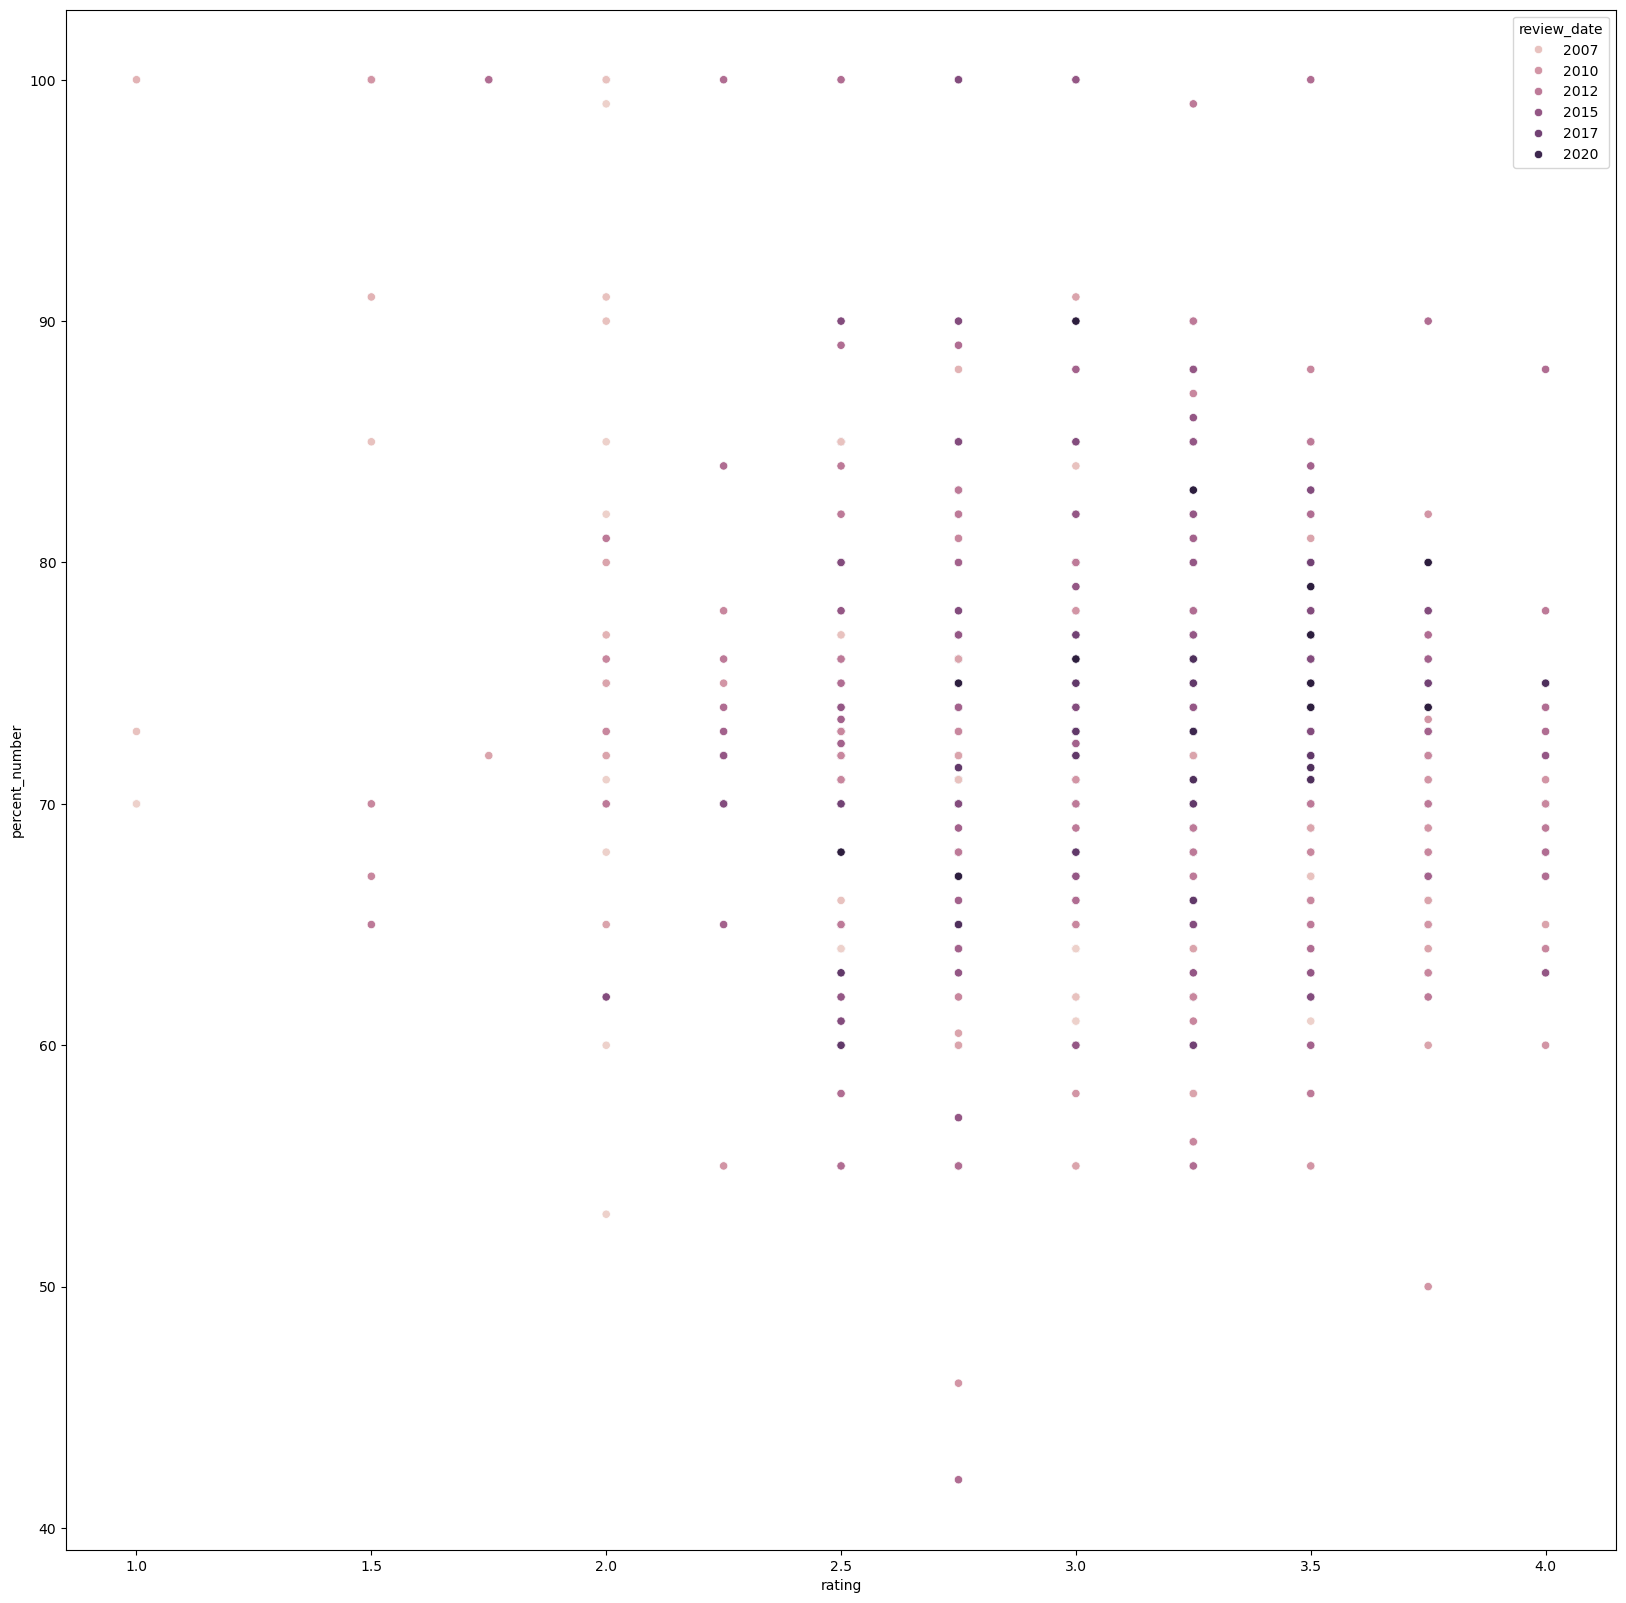

In [ ]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=df,y='percent_number', x='rating', hue='review_date')
plt.show

In [ ]:
df['percent_number'].fillna(0)
df

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,percent_number
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25,NaN
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50,NaN
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75,NaN
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00,NaN
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,NaN
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75,NaN
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75%,"3- B,S,C","fatty, earthy, cocoa",3.00,NaN
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,NaN


# Limpieza de datos (Continuación)

Temas a cubrir: 
- Manejo de Valores Duplicados (Identificación)
- Manejo de Valores Duplicados (Eliminación)
- Corrección de Tipos de Datos (Conversiones)
- Corrección de Tipos de Datos (Transformaciones)


**Definición**: Filas que contienen la misma información en todas o en algunas de sus columnas.

**Causas comunes**:
- Errores en la recolección de datos
- Inserciones repetidas
- Combinación de archivos con registros idénticos

**Importancia de eliminar duplicados**:
1. **Calidad del análisis**: Evita sesgos en estadísticas como promedios y conteos.
2. **Rendimiento**: Reduce el tamaño del dataset y mejora el tiempo de procesamiento.
3. **Modelos de ML**: Previene patrones redundantes, mejorando la capacidad de generalización del modelo.

**Funciones en pandas**:
- `duplicated()`: Detecta filas duplicadas.


- `drop_duplicates()`: Elimina duplicados.



## Manejo de valores duplicados (identificación)



In [ ]:
df_prueba = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
 })

df_prueba

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [ ]:
df_prueba.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [ ]:
df_prueba.duplicated(keep='last')

0     True
1    False
2    False
3    False
4    False
dtype: bool

In [ ]:
df_prueba.duplicated(keep=False) #  False : Mark all duplicates as True.

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [182]:
df_prueba

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [ ]:
df_prueba.duplicated(subset=['brand'])

0    False
1     True
2    False
3     True
4     True
dtype: bool

In [ ]:
df_prueba.duplicated(['brand'])

0    False
1     True
2    False
3     True
4     True
dtype: bool

In [183]:
df

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,percent_number
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25,76.0
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50,76.0
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75,76.0
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00,68.0
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,72.0
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,80.0
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75,75.0
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75%,"3- B,S,C","fatty, earthy, cocoa",3.00,75.0
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,70.0


In [ ]:
duplicados = df[df.duplicated()]
duplicados

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,percent_number


In [ ]:
numbers = []
for i in range(10):
    numbers.append(randint(0, 2531))

duplicated_rows = df.loc[numbers]

df = pd.concat([df, duplicated_rows], ignore_index=True)

print(df.tail(20))

       ref company_manufacturer company_location  review_date  \
2520   801               Zotter          Austria         2012   
2521   875               Zotter          Austria         2012   
2522   883               Zotter          Austria         2012   
2523   875               Zotter          Austria         2012   
2524   879               Zotter          Austria         2012   
2525  1205               Zotter          Austria         2014   
2526  1996               Zotter          Austria         2017   
2527  2036               Zotter          Austria         2018   
2528  2170               Zotter          Austria         2018   
2529  2170               Zotter          Austria         2018   
2530   572                 AMMA           Brazil         2010   
2531   785         French Broad           U.S.A.         2011   
2532  1514          Chocolarder             U.K.         2015   
2533  2570               Escazu           U.S.A.         2021   
2534   911         Blue B

In [ ]:
duplicados = df[df.duplicated()]
duplicados

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,percent_number
2530,1343,Sirene,Canada,2014,Ecuador,"Camino Verde P., Balao, Guayas",73%,"3- B,S,C","intense, rich, burnt, licorice",3.75,NaN
2531,1399,Naive,Lithuania,2014,Venezuela,"Barinas, lot 0077",70%,"4- B,S,C,L","coarse, sweet",3.00,NaN
2532,2166,Metiisto,Australia,2018,Solomon Islands,"Patovaki, Paspaskato Is",72%,"3- B,S,C","roasty/smokey, high acidity",3.25,NaN
2533,2426,Hogarth,New Zealand,2019,Venezuela,"Porcelana, Lake Maracaibo",68%,"3- B,S,C","high acid,sweet,nut,strawberry",3.25,NaN
2534,227,Scharffen Berger,U.S.A.,2008,Blend,"Finisterra, Ven., Trinidad, Mad.",72%,"5- B,S,C,V,L","grassy, black pepper, smoke",3.00,NaN
2535,1113,Hotel Chocolat (Coppeneur),U.K.,2013,Dominican Republic,"Conacado, 2012, 120hr c.batch 13092",100%,NaN,"trop. Fruit, coffee, bitter",2.75,NaN
2536,729,Stella (aka Bernrain),Switzerland,2011,India,India,72%,"4- B,S,C,V","peanut butter,vanilla,artificial",3.25,NaN
2537,777,Mast Brothers,U.S.A.,2011,Dominican Republic,"La Red de Guanconejo, N. Highlands coop",74%,"2- B,S","gritty, raspberry, sour",3.75,NaN
2538,2056,Auro,Philippines,2018,Philippines,"Paquibao E., 2016",70%,"3- B,S,C","waxy, dried fruit",3.00,NaN
2539,2458,Misina,Czech Republic,2020,Vietnam,Vietnam,70%,"3- B,S,C","sour fig, cocoa, creamy, fatty",3.50,NaN


In [ ]:
duplicados_col = df[df.duplicated(['review_date'])]
duplicados_col

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,percent_number
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50,76.0
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75,76.0
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,72.0
5,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80%,"3- B,S,C","mildly bitter, basic cocoa, fatty",3.25,80.0
6,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50,68.0
...,...,...,...,...,...,...,...,...,...,...,...
2535,642,Fresco,U.S.A.,2011,Dominican Republic,"Conacado, #212, LR, SC",72%,"3- B,S,C","red berry, some roasty notes",3.50,72.0
2536,947,Lillie Belle,U.S.A.,2012,Blend,"Purple Haze, Venezuela, Dom. Rep.",75%,"2- B,S","grits, roasted, nutty",2.75,75.0
2537,2234,Palet D'Or,Japan,2018,Cuba,Cuba,72%,"5- B,S,C,V,L","creamy, tobacco, cocoa",3.75,72.0
2538,245,Caoni (Tulicorp),Ecuador,2008,Ecuador,Los Rios,77%,"4- B,S,C,L","crumbly, cinamon",2.75,77.0


## Manejo de Valores Duplicados (Eliminación)

``.drop_duplicates()``

Return DataFrame with duplicate rows removed.

In [ ]:
df_prueba

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [ ]:
df_prueba.drop_duplicates()

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [184]:
df_prueba.drop_duplicates(['rating'])

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [ ]:
df_prueba.drop_duplicates(keep='last')

,brand,style,rating
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [186]:
df_prueba

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [ ]:
df_prueba.drop_duplicates(keep=False)

,brand,style,rating
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


## Manejo de Valores Duplicados (Eliminación)

In [ ]:
df

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,percent_number
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25,76.0
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50,76.0
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75,76.0
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00,68.0
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,72.0
...,...,...,...,...,...,...,...,...,...,...,...
2535,642,Fresco,U.S.A.,2011,Dominican Republic,"Conacado, #212, LR, SC",72%,"3- B,S,C","red berry, some roasty notes",3.50,72.0
2536,947,Lillie Belle,U.S.A.,2012,Blend,"Purple Haze, Venezuela, Dom. Rep.",75%,"2- B,S","grits, roasted, nutty",2.75,75.0
2537,2234,Palet D'Or,Japan,2018,Cuba,Cuba,72%,"5- B,S,C,V,L","creamy, tobacco, cocoa",3.75,72.0
2538,245,Caoni (Tulicorp),Ecuador,2008,Ecuador,Los Rios,77%,"4- B,S,C,L","crumbly, cinamon",2.75,77.0


In [ ]:
df.dtypes

ref                                   int64
company_manufacturer                 object
company_location                     object
review_date                           int64
country_of_bean_origin               object
specific_bean_origin_or_bar_name     object
cocoa_percent                        object
ingredients                          object
most_memorable_characteristics       object
rating                              float64
percent_number                      float64
dtype: object

In [ ]:
df['review_date'] = df['review_date'].astype(float)

In [ ]:
df.dtypes

ref                                   int64
company_manufacturer                 object
company_location                     object
review_date                         float64
country_of_bean_origin               object
specific_bean_origin_or_bar_name     object
cocoa_percent                        object
ingredients                          object
most_memorable_characteristics       object
rating                              float64
percent_number                      float64
dtype: object

## Corrección de Tipos de Datos (Transformaciones)